# Sensitivity Analysis for k #
### The key configuration parameter for k-fold cross-validation is k that defines the number folds in which to split a given dataset.
* Common values are k=3, k=5, and k=10, and by far the most popular value used in applied machine learning to evaluate models is k=10. The reason for this is studies were performed and k=10 was found to provide good trade-off of low computational cost and low bias in an estimate of model performance.

## How do we know what value of k to use when evaluating models on our own dataset?
* One approach to answering this question is to perform a sensitivity analysis for different k values. That is, evaluate the performance of the same model on the same dataset with different values of k and see how they compare.

### Note:-
* we can simulate this case using the leave-one-out cross-validation (LOOCV), a computationally expensive version of cross-validation where k=N, and N is the total number of examples in the training dataset. That is, each sample in the training set is given an example to be used alone as the test evaluation dataset. It is rarely used for large datasets as it is computationally expensive, although it can provide a good estimate of model performance given the available data
* We can then compare the mean classification accuracy for different k values to the mean classification accuracy from LOOCV on the same dataset. The difference between the scores provides a rough proxy for how well a k value approximates the ideal model evaluation test condition.

## Implementation in python and its libraries
### Steps:-
* Create or Load a dataset
* Create a cross validation class(F-fold)
* Create a model
* evaluate a model using cross_val_score with different K values
* plot accuracy of different K values
* Compare model mean scores with K-fold class to LOOCV class 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression

In [7]:
# create a data set
def get_dataset(n_samples=100):
    X,y=make_classification(n_samples=n_samples,n_features=20,n_informative=15,n_redundant=5,random_state=1)
    return X,y
# retrieve the model to be evaluate
def get_model():
    model=LogisticRegression()
    return model

In [12]:
## Evaluate model usning cross_val_score 
#here CV is class of cross_val_score
def evaluate_model(cv):
    X,y=get_dataset()
    model=get_model()
    scores=cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return np.mean(scores),np.min(scores),np.max(scores)

### Evaluate the model with ideal test condition using LOOCV

In [14]:
ideal, _, _ = evaluate_model(LeaveOneOut())
print("Ideal :%.3f"% ideal)
# print(ideal)

Ideal :0.840


### Evaluate the model with K-fold cross validation with K is value 2 to 30

In [15]:
Folds=range(2,31)

In [16]:
#record mean, max, min of each set of results
means,mins,maxs =list(),list(),list()
#evaluate model with k value
for k in Folds:
    #define the class of cross_val_score
    cv=KFold(n_splits=k, shuffle=True, random_state=1)
    #evaluate model with k values
    k_mean,k_min,k_max=evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    means.append(k_mean)
    mins.append(k_min)
    maxs.append(k_max)

> folds=2, accuracy=0.740 (0.700,0.780)
> folds=3, accuracy=0.749 (0.697,0.824)
> folds=4, accuracy=0.790 (0.640,0.920)
> folds=5, accuracy=0.810 (0.600,0.950)
> folds=6, accuracy=0.820 (0.688,0.941)
> folds=7, accuracy=0.799 (0.571,1.000)
> folds=8, accuracy=0.811 (0.385,0.923)
> folds=9, accuracy=0.829 (0.636,1.000)
> folds=10, accuracy=0.850 (0.600,1.000)
> folds=11, accuracy=0.829 (0.667,1.000)
> folds=12, accuracy=0.785 (0.250,1.000)
> folds=13, accuracy=0.839 (0.571,1.000)
> folds=14, accuracy=0.807 (0.429,1.000)
> folds=15, accuracy=0.821 (0.571,1.000)
> folds=16, accuracy=0.827 (0.500,1.000)
> folds=17, accuracy=0.816 (0.600,1.000)
> folds=18, accuracy=0.831 (0.600,1.000)
> folds=19, accuracy=0.826 (0.600,1.000)
> folds=20, accuracy=0.830 (0.600,1.000)
> folds=21, accuracy=0.814 (0.500,1.000)
> folds=22, accuracy=0.820 (0.500,1.000)
> folds=23, accuracy=0.802 (0.250,1.000)
> folds=24, accuracy=0.804 (0.250,1.000)
> folds=25, accuracy=0.810 (0.250,1.000)
> folds=26, accuracy=0.8

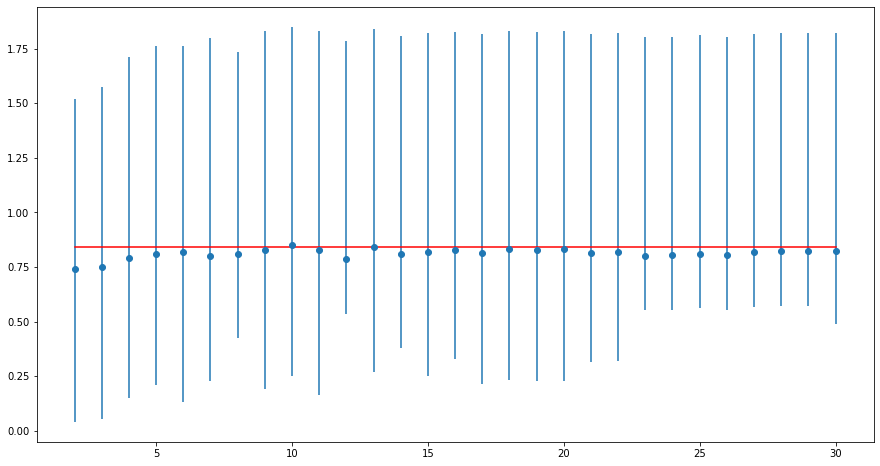

In [20]:
# line plot of k mean values with min/max error bars
plt.figure(figsize=(15,8))
plt.errorbar(Folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(Folds, [ideal for _ in range(len(Folds))], color='r')
# show the plot
plt.show()